<a href="https://colab.research.google.com/github/maddisurekha1234/Dental_Informatics_Project/blob/main/Analysis_on_Authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Collectingdatatocsvfiles ***


In [ ]:
#Mounting the drive for collecting data from csv files 
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'		    jsonfiles	       stsa-test.txt
 Inclass_exercise_five_inputfiles   Sample_Input.csv   stsa-train.txt


In [ ]:
#Reading all the csv files and replacing the url in article no to get the article id's
import glob
import pandas as pd
import os
import csv
# Select all the files in your directory
directory = r'/content/drive/My Drive/'
files = glob.glob(directory + "/*.csv")
print(files)
df1 = pd.concat([pd.read_csv(fp,skipinitialspace=True,encoding = "ISO-8859-1").assign(New=os.path.basename(fp)) for fp in files])
df1['article_no'] = df1['article_id'].str.replace('https://doi.org/','') 
df1.to_csv('output.csv')
print(df1.head())

['/content/drive/My Drive/Sample_Input.csv']
  Pubmed Google Scholar  ...               New                    article_no
0     pm            NaN  ...  Sample_Input.csv                 10.2196/18652
1     pm            NaN  ...  Sample_Input.csv        10.1055/s-0040-1709506
2     pm            NaN  ...  Sample_Input.csv    10.1186/s13326-020-00222-0
3     pm            NaN  ...  Sample_Input.csv      10.1177/2380084419892550
4    NaN            NaN  ...  Sample_Input.csv  10.1007/978-3-319-98298-4_11

[5 rows x 16 columns]


In [ ]:
#Removing the unwanted data
data = pd.read_csv("output.csv") 
df1 = data[pd.notnull(data['article_id'])]
df1.to_csv('articleoutput.csv')
#reading the csvfile
data = pd.read_csv("articleoutput.csv") 
header = ["article_no"]
df1.to_csv('articleno.csv', columns = header)

In [ ]:
#appending the url to all the article id's collected for collecting the json files. 
import csv
import itertools
contents = []
with open('articleno.csv','r') as csvf:
    urls = csv.reader(csvf)
    next(urls, None)
    contents = [row[1] for row in itertools.islice(urls,975)] 
string = 'https://api.semanticscholar.org/v1/paper/'
my_new_list = [string+x for x in contents]
with open("Article_URLs.csv","w") as f:
    writer = csv.writer(f,delimiter="\n")
    writer.writerow(['ArticleURL'])
    writer.writerow(my_new_list)


In [ ]:
#Code to collect the json files.
import urllib.request
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import time


countUp = 0
headers = {}
headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'
for j in my_new_list:
 time.sleep(2)
 try:
     print("&&&&&&&",j)
    #  j_url = j.replace(" ","")
    #  print("j_url",j_url)
    #  ascii_url = j_url.encode('utf-8')
    #  print("********** ascii_url",ascii_url,type(ascii_url))
    #  d_ascii_url = ascii_url.decode('utf-8')
    #  print("********** d_ascii_url ",d_ascii_url)
    #  a=str(ascii_url,'utf-8')
    #  print("********** a ",a)
     req = urllib.request.Request(j,headers=headers)
     print("********** req ",req)
     response = urllib.request.urlopen(req)
     print("response",response)
     res=response.read().decode('utf8')
     print("res",res)
     time.sleep(0.1)
     print("Here",res)
     with open ('/content/drive/MyDrive/jsonfiles/Article' + str(countUp) + '.json', 'w') as g:
          g.write(res)
     countUp += 1
 except HTTPError as e:
    print('The server couldn\'t fulfill the request.')
    print('Error code: ', e.code)
    time.sleep(30) 
 except URLError as e:
    print('We failed to reach a server.')
    print('Reason: ', e.reason)
    time.sleep(30)
 except URLError as i:
    print('Invalid url')
    print('Reason: ', e.reason)
    time.sleep(30)

&&&&&&& https://api.semanticscholar.org/v1/paper/10.2196/18652
********** req  <urllib.request.Request object at 0x7fe589d9d650>
response <http.client.HTTPResponse object at 0x7fe589d9d790>
res {"abstract":"Background Over the last two decades, patient review websites have emerged as an essential online platform for doctor ratings and reviews. Recent studies suggested the significance of such websites as a data source for patients to choose doctors for healthcare providers to learn and improve from patient feedback and to foster a culture of trust and transparency between patients and healthcare providers. However, as compared to other medical specialties, studies of online patient reviews that focus on dentists in the United States remain absent. Objective This study sought to understand to what extent online patient reviews can provide performance feedbacks that reflect dental care quality and patient experience. Methods Using mixed informatics methods incorporating statistics, natur

In [ ]:
#For downloading the zip of all the collected json articles
from google.colab import files
#For the folder you have to zip it first and can only download later on
!zip -r Articles.zip /content/drive/MyDrive/jsonfiles/Article
#Download files
files.download('Articles.zip')

  adding: content/drive/MyDrive/jsonfiles/Article/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*** Reading the json file code***


In [ ]:
!pip install textblob
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
from textblob import Word
from nltk.stem import PorterStemmer

nltk.download('stopwords')
st=PorterStemmer()
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords
#stopwords = nltk.corpus.stopwords.words('english')
stop=stopwords.words('english')
stop.append('inform retriev')
print(stop)
with open('stopwordslist.txt', 'w') as f:
    for item in stop:
        f.write("%s\n" % item)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Extracting the article information from all the json files.
import json
import pandas
from pandas import DataFrame
topicListString = ""
Venuelist = []
Titlelist = []
Yearlist = []
Abstractlist = []
Doilist = []
FieldsOfStudylist = []
Topiclist = []
urllist = []
influentialCitationCountlist = []
totalcitationcountlist = []
#articleidlist = []
#pdfdownloadlist = []
for i in range(79):
  topicListString = ""
  f = open('/content/drive/MyDrive/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  venue = data['venue']
  Venuelist.append(venue)
  title = data['title']
  Titlelist.append(title)
  year = data['year']
  Yearlist.append(year)
  abstract = data['abstract']
  Abstractlist.append(abstract)
  doi = data['doi']
  Doilist.append(doi)
  fieldsOfStudy = data['fieldsOfStudy']
  FieldsOfStudylist.append(fieldsOfStudy)
  influentialCitationCount = data['influentialCitationCount']
  influentialCitationCountlist.append(influentialCitationCount)
  totalcitationcount = len(data['citations'])
  totalcitationcountlist.append(totalcitationcount)
  for value in data['topics']:
    topic = value['topic']
    Topiclist.append(topic)
    topicListString = topicListString + ","+ topic
  url = data['url']
  urllist.append(url)
  topicListString = topicListString[1:]
  Topiclist.append(topicListString)   
f.close()
print(Topiclist)

['Crew Resource Management, Healthcare', 'Dental Procedures', 'Crew Resource Management, Healthcare,Dental Procedures', 'Dental Records', 'Deciduous tooth', 'Edrophonium', 'Tooth root structure', 'Structure of permanent tooth', 'Behavior', 'General Practice, Dental', 'Odontogenic Tissue', 'Insurance, Dental', 'Supernumerary', 'Pulp Canals', 'Forty Nine', 'Posterior Pituitary Hormones', 'Silo (dataset)', 'Sodium monofluorophosphate 0.0076 MG/MG Toothpaste', 'Document completion status - Documented', 'Patients', 'Dental Records,Deciduous tooth,Edrophonium,Tooth root structure,Structure of permanent tooth,Behavior,General Practice, Dental,Odontogenic Tissue,Insurance, Dental,Supernumerary,Pulp Canals,Forty Nine,Posterior Pituitary Hormones,Silo (dataset),Sodium monofluorophosphate 0.0076 MG/MG Toothpaste,Document completion status - Documented,Patients', '', 'Precipitating Factors', 'Electronic Health Records', 'Pain', 'soft tissue', 'Classification', 'Adverse event', 'Traumatic injury', 

In [ ]:
#appending a string to article id and the pdf download link.
articleidlist=[]
pdfdownloadlist = []
string = 'https://doi.org/'
for item in Doilist:
  articleidlist.append(string+str(item))
string1 = 'https://dl.acm.org/doi/pdf/'
string2='?download=true' 
for item in Doilist:
  pdfdownloadlist.append(string1+str(item)+string2)

In [18]:
# Cleaning the data and loading the data into a dataframe and csv files.
import pandas as pd
import glob
import pandas as pd
import os
import string

# # Select all the files in your directory
# fields = ["TotalDownloadCount"]
# dfarticle = pd.read_csv("1_80 articles.csv", usecols=fields)
#totalcitationlist = dfarticle['total_citation'].values.tolist()
# totaldownloadlist = dfarticle['TotalDownloadCount'].values.tolist()
a = {'Article_id' : articleidlist ,'Venue' : Venuelist ,'Title' : Titlelist ,'Year' :Yearlist, 'Abstract': Abstractlist,
     'Doi' : Doilist,'fieldsOfStudy' : FieldsOfStudylist, 'topics': Topiclist , 'Downloadurl' : pdfdownloadlist,'TotalCitationCount' : totalcitationcountlist,
      'Influentialcitationcount' : influentialCitationCountlist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1["Abstract"]=df1["Abstract"].str.lower() 
df1['Abstract'] = df1['Abstract'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
df1["Abstract"]=df1['Abstract'].str.replace('[{}]'.format(string.punctuation), '')
df1['fieldsOfStudy'] = df1['fieldsOfStudy'].apply(str)
df1['fieldsOfStudy'] = df1['fieldsOfStudy'].str.replace('[{}]'.format(string.punctuation), '')
df1['fieldsOfStudy']
df1 = df1[pd.notnull(df1['Article_id'])]
df1.to_csv('table1.csv', columns = a)
df1

Article_id  ... Influentialcitationcount
0                  https://doi.org/10.2196/18652  ...                        0
1         https://doi.org/10.1055/s-0040-1709506  ...                        0
2     https://doi.org/10.1186/s13326-020-00222-0  ...                        0
3       https://doi.org/10.1177/2380084419892550  ...                        0
4   https://doi.org/10.1007/978-3-319-98298-4_11  ...                        0
..                                           ...  ...                      ...
74    https://doi.org/10.1177/154407370301700103  ...                        3
75    https://doi.org/10.1177/154407370301700104  ...                        3
76    https://doi.org/10.1177/154407370301700106  ...                        0
77    https://doi.org/10.1177/154407370301700105  ...                        0
78    https://doi.org/10.1177/154405910208100902  ...                        0

[79 rows x 11 columns]

In [22]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.stem.snowball import SnowballStemmer

ps = PorterStemmer()
lemma = WordNetLemmatizer()

df = pd.read_csv('table1.csv', encoding='utf-8')
df["Title"]=df["Title"].str.lower() 
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
df['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
df["Title"]=df['Title'].str.replace('[{}]'.format(string.punctuation), '')
#lemmatization
df['Title']= df['Title'].apply(lambda x : [lemma.lemmatize(y) for y in x])
df['Abstract']= df['Abstract'].apply(lambda x : [lemma.lemmatize(y) for y in x])
#stemming
stemmer = SnowballStemmer("english")
def stemming(text):    
    text = [stemmer.stem(word) for word in text.split() ]
    return " ".join(text) 
def remove_punc(text):
  no_punc="".join([c for c in text if c not in string.punctuation])
  return no_punc
df['Title']= df['Title'].apply(lambda x : remove_punc(x))
df['Abstract']= df['Abstract'].apply(lambda x : remove_punc(x))
df['Title'] = df['Title'].apply(stemming)
df['Abstract'] = df['Abstract'].apply(stemming)
df.to_csv("sample.csv")
df.head(10)

Unnamed: 0  ... Influentialcitationcount
0           0  ...                        0
1           1  ...                        0
2           2  ...                        0
3           3  ...                        0
4           4  ...                        0
5           5  ...                        0
6           6  ...                        0
7           7  ...                        0
8           8  ...                        0
9           9  ...                        0

[10 rows x 12 columns]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [24]:
from itertools import islice
df1 = pd.read_csv("sample.csv")
cvec.fit(df1.Title)
list(islice(cvec.vocabulary_.items(),40))

[('assess', 36),
 ('patient', 485),
 ('experi', 265),
 ('healthcar', 317),
 ('qualiti', 550),
 ('care', 74),
 ('use', 697),
 ('onlin', 451),
 ('review', 602),
 ('unit', 690),
 ('state', 632),
 ('mix', 426),
 ('method', 424),
 ('studi', 643),
 ('assess patient', 38),
 ('patient experi', 493),
 ('experi healthcar', 266),
 ('healthcar qualiti', 319),
 ('qualiti dental', 552),
 ('dental care', 165),
 ('care use', 82),
 ('use patient', 704),
 ('patient onlin', 495),
 ('onlin review', 454),
 ('review unit', 604),
 ('unit state', 691),
 ('state mix', 634),
 ('mix method', 427),
 ('method studi', 425),
 ('leverag', 396),
 ('electron', 236),
 ('record', 557),
 ('data', 149),
 ('clinic', 101),
 ('research', 583),
 ('nation', 438),
 ('pbrn', 502),
 ('practic', 518),
 ('leverag electron', 397),
 ('electron dental', 237)]

In [25]:

# Check how many total n-grams we have
len(cvec.vocabulary_)

722

In [26]:
# Initialize the vectorizer with new settings and check the new vocabulary length
cvec = CountVectorizer(min_df=.0025, max_df=.1, ngram_range=(1,2))
cvec.fit(df1.Title)
len(cvec.vocabulary_)

738

In [27]:
cvec_counts = cvec.transform(df1.Title)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (79, 738)
nonzero count: 956
sparsity: 1.64%


In [28]:
import numpy as np
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


term  occurrences
551        qualiti            7
642          studi            6
169    dental care            6
416   medic dental            6
174    dental data            6
411         measur            5
519        practic            5
460           oral            5
208        develop            5
631          state            5
561    record data            5
20           among            5
178  dental inform            4
324      implement            4
92        challeng            4
313  health inform            4
638        student            4
451          onlin            4
157    data integr            4
374         integr            4

In [33]:
#Collecting all the author information from the json files
import json
import pandas
from pandas import DataFrame
authorIdlist = []
authorname = []
authorurl = []
Doilist = []
authorrank = []
#authorinstitution = []
publicationcount = []
for i in range(80):
  f = open('/content/drive/MyDrive/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  string = 'https://doi.org/'
  articleidlist = [string+x for x in Doilist]
  doi = data['doi']
  for value in data['authors']:
    Doilist.append(doi)
    authorId = value['authorId']
    authorIdlist.append(authorId) 
  for value in data['authors']:
    name = value['name']
    authorname.append(name) 
  for value in data['authors']:
    url = value['url']
    authorurl.append(url)
  for value in data['authors']:
    rank = value['authorId']
    authorrank.append(authorId)
f.close()

In [34]:
#appendong the data into dataframe and csv files
import pandas as pd
import glob
import pandas as pd
import os
# Select all the files in your directory
a = {'article_id': Doilist, 'authorId' : authorIdlist ,'name' : authorname ,'url' : authorurl,'Publicationcount':publicationcount}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
abc = df1['article_id']
abc = abc.tolist()
new_df12 = pd.DataFrame(abc, columns=['c1_new'])
hope = new_df12['c1_new'].value_counts(sort=False).to_dict()
new_hope = []
keys = new_df12['c1_new'].unique()
keys
for key in keys:
  values = hope[key]
  for i in range(1,values+1):
    new_hope.append(i)
new_df12['Rank']=new_hope
df1['Rank']=new_hope
df1.to_csv('/content/drive/MyDrive/jsonfiles/Article/table2.csv')
df1

article_id    authorId  ... Publicationcount Rank
0                    10.2196/18652    13045722  ...             None    1
1                    10.2196/18652  2107102478  ...             None    2
2                    10.2196/18652    49822566  ...             None    3
3                    10.2196/18652    35167270  ...             None    4
4                    10.2196/18652  2111138936  ...             None    5
..                             ...         ...  ...              ...  ...
397     10.1177/154407370301700105     1690314  ...             None    1
398     10.1177/154407370301700105     2266623  ...             None    2
399     10.1177/154407370301700105     4913417  ...             None    3
400     10.1177/154405910208100902   144487364  ...             None    1
401  10.1016/s0011-8532(02)00016-2     2169003  ...             None    1

[402 rows x 6 columns]

In [36]:
# #Appending a url to the author_id collected for reading the json file
import csv
import itertools
contents = []
with open('/content/drive/MyDrive/jsonfiles/Article/table2.csv','r') as csvf:
    urls = csv.reader(csvf)
    next(urls, None)
    contents = [row[2] for row in itertools.islice(urls,2217)] 
string = 'https://api.semanticscholar.org/v1/author/'
my_new_list = [string+x for x in contents]
with open("Article_URLs.csv","w") as f:
    writer = csv.writer(f,delimiter="\n")
    writer.writerow(['ArticleURL'])
    writer.writerow(my_new_list)

In [38]:
#Code to read the json file from the above obtained list of urls for collecting aublication count of each author.
import json
import pandas
from pandas import DataFrame
import urllib.request
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import time
countUp = 0
headers = {}
headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'
publicationcount = []
for i in range(80):
   try:
     webUrl  = urllib.request.urlopen(my_new_list[i])
     data = webUrl.read()
     count =str(data).count('paperId')
     time.sleep(2)
     
     time.sleep(0.1)
     countUp += 1
   except HTTPError as e:
     pass
     print('The server couldn\'t fulfill the request.')
     print('Error code:' , e.code)
     count='NaN'
     time.sleep(30) 
   except URLError as e:
     print('We failed to reach a server.')
     print('Reason: ', e.reason)
     time.sleep(30)    
 
   #print(str(count) + ' ' + str(i))
   publicationcount.append(count)

In [54]:
#collection of citation information from all the json files and appending it to a dataframe and generating csv file.
import json
import pandas as pd
from pandas import DataFrame
article_id = []
citingpaperId = []
citingdoi = []
citingtitle = []
citingvenue = []
citingyear = []
citingintent = []
citinginfluential = []
authornamelist= []
authoridlist = []
authorurllist = []
for i in range(80):
  f = open('/content/drive/MyDrive/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['citations']:
    paperId = value['paperId']
    doi = value['doi']
    title = value['title']
    venue = value['venue']
    year = value['year']
    intent = value['intent']
    isInfluential = value['isInfluential']
    print("******",value['authors'])
    # for i in value['authors']:
    #  citingpaperId.append(paperId)
    #  article_id.append(article_data)
    #  citingdoi.append(doi)
    #  citingtitle.append(title)
    #  citingvenue.append(venue)
    #  citingyear.append(year)
    #  citingintent.append(intent)
    #  citinginfluential.append(isInfluential) 
    #  authorname = i['name']
    #  authornamelist.append(authorname)
    #  authorid = i['authorId']
    #  authoridlist.append(authorid)
    #  authorurl= i['url']
    #  authorurllist.append(authorurl) 
    for value in data['authors']:
      citingpaperId.append(paperId)
      article_id.append(article_data)
      citingdoi.append(doi)
      citingtitle.append(title)
      citingvenue.append(venue)
      citingyear.append(year)
      citingintent.append(intent)
      citinginfluential.append(isInfluential) 
      authorId = value['authorId']
      print("authorIdauthorIdauthorId",authorId)
      author_id=authorId
      authorIdlist.append(author_id) 
    # for value in data['authors']:
      name = value['name']
      authorname=name
      authornamelist.append(authorname)
    # for value in data['authors']:
      url = value['url']
      auth_url=url
      print("auth_urlauth_urlauth_url",auth_url)
      authorurllist.append(auth_url)
    # for value in data['authors']:
      rank = value['authorId']
      authorrank.append(authorId)
a = {'article_id': article_id,'authorid': authoridlist,'authorname':authornamelist,'authorurl': authorurllist, 'paperId' : citingpaperId ,'doi' : citingdoi ,'title' : citingtitle ,
     'venue' :citingvenue, 'year': citingyear,
     'intent' : citingintent,'isInfluential' : citinginfluential}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['intent'] = df1['intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('table3.csv', columns = a)
df1

Streaming output truncated to the last 5000 lines.
authorIdauthorIdauthorId 123388993
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/123388993
authorIdauthorIdauthorId 7622524
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/7622524
authorIdauthorIdauthorId 48008365
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/48008365
authorIdauthorIdauthorId 145680051
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/145680051
authorIdauthorIdauthorId 7337497
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/7337497
****** [{'authorId': '2208460', 'name': 'Hesham F. Marei'}, {'authorId': '3321278', 'name': 'Gohar Wajid'}]
authorIdauthorIdauthorId 2371560
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/2371560
authorIdauthorIdauthorId 1779440
auth_urlauth_urlauth_url https://www.semanticscholar.org/author/1779440
authorIdauthorIdauthorId 3971080
auth_urlauth_urlauth_url https://www.semanticscholar.org/author

article_id  ... isInfluential
0                     10.2196/18652  ...         False
1                     10.2196/18652  ...         False
2                     10.2196/18652  ...         False
3                     10.2196/18652  ...         False
4                     10.2196/18652  ...         False
...                             ...  ...           ...
8528  10.1016/s0011-8532(02)00016-2  ...         False
8529  10.1016/s0011-8532(02)00016-2  ...          True
8530  10.1016/s0011-8532(02)00016-2  ...         False
8531  10.1016/s0011-8532(02)00016-2  ...         False
8532  10.1016/s0011-8532(02)00016-2  ...         False

[8533 rows x 11 columns]

In [57]:
#collection of reference information and appending the data into a datraframe and csv file.
import re
referencepaperidlist = []
Referencepaperdoilist = []
Referencepapertitlelist = []
Referencepapervenuelist = []
Referencepaperyearlist = []
Isinfluentiallist = [] 
Intentlist = []
article_id = []
for i in range(80):
  f = open('/content/drive/MyDrive/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['references']:
    article_id.append(article_data)
    referencepaperid = value['paperId']
    referencepaperidlist.append(referencepaperid)
    referencepaperdoi = value['doi']
    Referencepaperdoilist.append(referencepaperdoi)
    Referencepapertitle = value['title']
    Referencepapertitlelist.append(Referencepapertitle)
    Referencepapervenue = value['venue']
    Referencepapervenuelist.append(Referencepapervenue)
    Referencepaperyear = value['year']
    Referencepaperyearlist.append(Referencepaperyear)
    Intent = value['intent']
    Intentlist.append(Intent)
    Isinfluential = value['isInfluential']
    Isinfluentiallist.append(Isinfluential)
a = {'article_id': article_id,'Reference_paper_id' : referencepaperidlist ,'Reference _paper_doi' : Referencepaperdoilist ,'Reference _paper_title' : Referencepapertitlelist ,
     'Reference _paper_venue' :Referencepapervenuelist, 'Reference _paper_year': Referencepaperyearlist,
     'Intent' : Intentlist,'Is_influential' : Isinfluentiallist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['Intent'] = df1['Intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('/content/drive/MyDrive/jsonfiles/Article/table4.csv', columns = a)
df1

article_id  ... Is_influential
0                  10.2196/18652  ...          False
1                  10.2196/18652  ...          False
2                  10.2196/18652  ...          False
3                  10.2196/18652  ...          False
4                  10.2196/18652  ...          False
...                          ...  ...            ...
2737  10.1177/154405910208100902  ...          False
2738  10.1177/154405910208100902  ...          False
2739  10.1177/154405910208100902  ...          False
2740  10.1177/154405910208100902  ...          False
2741  10.1177/154405910208100902  ...          False

[2742 rows x 8 columns]

   Unnamed: 0     article_id  authorid  ...    year intent isInfluential
0           0  10.2196/18652       NaN  ...  2021.0    NaN         False
1           1  10.2196/18652       NaN  ...  2021.0    NaN         False
2           2  10.2196/18652       NaN  ...  2021.0    NaN         False
3           3  10.2196/18652       NaN  ...  2021.0    NaN         False
4           4  10.2196/18652       NaN  ...  2021.0    NaN         False

[5 rows x 12 columns]
*****************
      Unnamed: 0                   article_id  authorid  ... authorId count   Rank
68            68       10.1055/s-0040-1709506       NaN  ...        0   362    1.0
270          270         10.21815/JDE.019.089       NaN  ...        0   175    2.0
181          181       10.1055/s-0039-1688832       NaN  ...        0   159    3.0
2861        2861      10.4103/2231-0762.97695       NaN  ...        0   131    5.5
2860        2860      10.4103/2231-0762.97695       NaN  ...        0   131    5.5
...          ...       

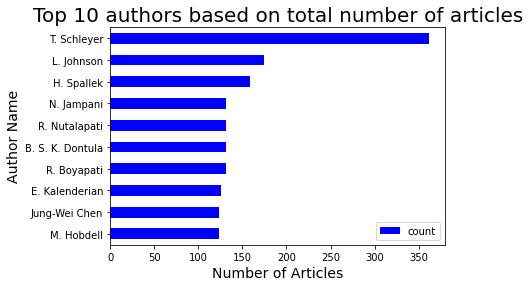

authorname  count
68         T. Schleyer    362
270         L. Johnson    175
181         H. Spallek    159
2858        N. Jampani    131
2859     R. Nutalapati    131
2860  B. S. K. Dontula    131
2861       R. Boyapati    131
155     E. Kalenderian    126
7663     Jung-Wei Chen    123
7664        M. Hobdell    123

In [71]:
#Auhor analysis and ranking the author based on the total number of articles written.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("table3.csv")
print(df.head())
df['authorId'] = df['authorid'].fillna(0).astype(int)
df['count'] = df.groupby('authorname')['authorname'].transform('count')
df.drop_duplicates('authorname', inplace=True)
#df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=0)
print("*****************")
print(df1)
df1 = df1.dropna(subset=['Rank'])
df2=df1[["authorname", "authorId", "Rank"]]
df2.to_csv("sample_author_output.csv")
header = ["authorname", "authorId", "Rank"]
df2
df2.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(10, ['count'])[["authorname","count"]]

#Plotting a graph for top 10 authors with the maximum number of articles published.
plotgraph.set_index("authorname",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'Blue')
ax.invert_yaxis()
plt.title("Top 10 authors based on total number of articles",fontsize=20)
plt.xlabel("Number of Articles",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["authorname","count"]]
plotgraph

In [ ]:
#topics for each year and ranking the years based on the number of topics for each year.
topics = pd.read_csv("sample.csv")
topics['count'] = topics.groupby(['Year'])['topics'].transform('count')
topics.drop_duplicates('count', inplace=True)
#topics.nlargest(5, ['count'])[["topics","count"]]
topics1 = topics.sort_values('count',ascending=False)
topics1["Rank"] = topics1["count"].rank(ascending=0)
topics1 = topics1.dropna(subset=['Rank'])
header = ["Year", "topics", "Rank"]
topics1.to_csv('topic_distribution.csv', columns = header)
topicsplot = pd.read_csv("topic_distribution.csv") 
topics1.nlargest(10, ['count'])[["topics","Rank","Year"]]